# Milestone 1

## Objective
- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.


## i. Perkenalan

- Nama    : Anugrah Yoga Pratama
- Batch   : FTDS-10
- Dataset : [WA_Fn-UseC_-Telco-Customer-Churn.csv](https://www.kaggle.com/blastchar/telco-customer-churn)
- URL Deployment : [Heroku](https://yoga-p2m1-customer-churn.herokuapp.com/)

```
Tentang dataset: Telco Customer Churn
1. Informasi Demografis
    - gender: Apakah klien adalah perempuan atau laki-laki (Perempuan, Laki-laki).
    - SeniorCitizen: Apakah klien adalah warga senior atau tidak (0, 1).
    - Partner: Apakah klien memiliki pasangan atau tidak (Ya, Tidak).
    - Dependents: Apakah klien memiliki tanggungan atau tidak (Ya, Tidak).

2. Informasi Akun Pelanggan
    - tenure: Jumlah bulan pelanggan telah tinggal di perusahaan (Beberapa nilai numerik berbeda).
    - Contract: Menunjukkan jenis kontrak pelanggan saat ini (Bulan-ke-Bulan, Satu tahun, Dua tahun).
    - PaperlessBilling: Apakah klien memiliki paperless billing atau tidak (Ya, Tidak).
    - PaymentMethod: Metode pembayaran pelanggan (Cek elektronik, Cek pos, Transfer bank (otomatis), Kartu Kredit (otomatis)).
    - MontlyCharges: Jumlah yang dibebankan kepada pelanggan setiap bulan (Beberapa nilai numerik berbeda).
    - TotalCharges: Jumlah total yang dibebankan kepada pelanggan (Beberapa nilai numerik yang berbeda).

3. Informasi Layanan
    - PhoneService: Apakah klien memiliki layanan telepon atau tidak (Ya, Tidak).
    - MultipleLines: Apakah klien memiliki banyak saluran atau tidak (Tidak, Ya).
    - InternetServices: Apakah klien berlangganan layanan Internet dengan perusahaan (DSL, Fiber optic, No)
    - OnlineSecurity: Apakah klien memiliki keamanan online atau tidak (Tidak, Ya).
    - OnlineBackup: Apakah klien memiliki cadangan online atau tidak (Tidak, Ya).
    - DeviceProtection: Apakah klien memiliki perlindungan perangkat atau tidak (Tidak, Ya).
    - TechSupport: Apakah klien memiliki dukungan teknis atau tidak (Tidak, Ya).
    - StreamingTV: Apakah klien memiliki TV streaming atau tidak (Tidak, Ya).
    - StreamingMovies: Apakah klien memiliki streaming film atau tidak (Tidak, Ya).
```

## ii. Import Libraries

Import pustaka.

In [121]:
import warnings
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
from scipy import stats
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from pandas.core.common import SettingWithCopyWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

## iii. Data Loading

Load data dari local.

In [122]:
df_ori = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df_ori.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cek ukuran dataset.

In [61]:
print(f'Ukuran dari dataset adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dari dataset adalah 7043 baris dan 21 kolom


Informasi dataset.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Sepertinya tidak ada missing value.

## iv. Exploratory Data Analysis (EDA)

Cek korelasi fitur numerik.

Text(0.5, 1.0, 'Korelasi antar fitur numerik')

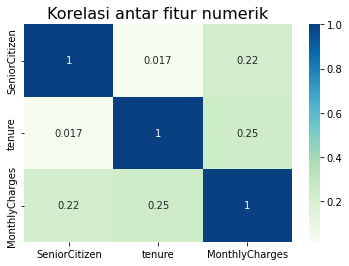

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True ,cmap='GnBu')
plt.title('Korelasi antar fitur numerik', fontsize=16)

> Korelasi antar fitur numerik terlihat bagus tidak ada yang memiliki hubungan kuat.

Deskripsi data.

In [64]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
df.SeniorCitizen.unique()

array([0, 1])

> Fitur SeniorCitizen masuk sebenarnya masuk ke kategorik tetapi sudah terencode.

Coba kita ganti dengan kategorik berupa no dan yes.

In [66]:
df.SeniorCitizen = df.SeniorCitizen.replace({0: 'No', 1: 'Yes'})

Membuat fungsi untuk mengembalikan nama-nama kolom kategori atau numerik.

In [67]:
# fungsi kolom kategori
def object_col(dataFrame):
    objcol = dataFrame.select_dtypes(include=['object', 'category', 'datetime']).columns.to_list()
    return objcol

# fungsi kolom numerik
def numeric_col(dataFrame):
    numcol = dataFrame.select_dtypes(include='number').columns.to_list()
    return numcol

Cek proporsi jumlah kelas dalam label.

In [68]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [69]:
print(f'Perbandingan proporsi No dengan Yes: {df.Churn.value_counts(normalize=True)[0]/df.Churn.value_counts(normalize=True)[1]:.1f}:1')

Perbandingan proporsi No dengan Yes: 2.8:1


> Terlihat bahwa jumlah label No memiliki proporsi 73% dan Yes memiliki proporsi 27% sehingga kedua label memiliki perbandingan sekitar 2.8:1. Jika perlu, dilakukan oversampling untuk menyamakan proporsi jumlah kelas.

Label yang berupa Churn menunjukkan kita lebih memilih untuk meminimalkan False Negative (FN yaitu model memprediksi customer tidak churn padahal sebenarnya churn) daripada False Positive (FP yaitu model memprediksi customer churn padahal sebenarnya tidak churn). Dengan demikian metrik yang tepat digunakan dalam kasus ini adalah Recall $\frac{TP}{TP+FN}$.

Cek nilai unique setiap fitur kategorik.

In [70]:
for catcol in object_col(df):
    print(f'{catcol : <18}: {df[catcol].unique()}')

customerID        : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender            : ['Female' 'Male']
SeniorCitizen     : ['No' 'Yes']
Partner           : ['Yes' 'No']
Dependents        : ['No' 'Yes']
PhoneService      : ['No' 'Yes']
MultipleLines     : ['No phone service' 'No' 'Yes']
InternetService   : ['DSL' 'Fiber optic' 'No']
OnlineSecurity    : ['No' 'Yes' 'No internet service']
OnlineBackup      : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport       : ['No' 'Yes' 'No internet service']
StreamingTV       : ['No' 'Yes' 'No internet service']
StreamingMovies   : ['No' 'Yes' 'No internet service']
Contract          : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod     : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges      : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn        

Nampak ada yang aneh pada fitur TotalCharges. Coba kita lihat banyaknya nilai unique pada fitur tersebut.

In [71]:
df.TotalCharges.nunique()

6531

Disini kita mendapati bahwa terdapat fitur yang nampaknya adalah numerik bertipe float namun dalam bentuk object. Coba kita cek apakah terdapat nilai string didalamnya dengan mengurutkan valuenya.

In [72]:
df.TotalCharges.sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

Kita dapati bahwa terdapat missing value pada fitur tersebut sehingga string yang kosong nilainya kita ubah jadi NaN.

In [73]:
df = df.replace(' ', np.nan)

Membuat fungsi untuk mengembalikan jumlah missing value dan persentasenya.

In [74]:
# fungsi menghitung jumlah dan persentase missing value
def missval_pct(datacol):
    count_missval = datacol.isna().sum()
    pct = count_missval/len(df)*100
    return count_missval, pct

Sekarang coba kita cek persentase jumlah missing value pada seluruh fitur .

In [75]:
print('Missing value:')
for col in df.columns:
    if missval_pct(df[col])[0] > 0:
        print(f'{col} : {missval_pct(df[col])[1]:.2f}% or {missval_pct(df[col])[0]} data')

Missing value:
TotalCharges : 0.16% or 11 data


Ternyata fitur TotalCharges memiliki missing value berjumlah 11 data atau setara dengan 0.16% dari total data. Sekarang kita ubah tipe datanya menjadi float dari yang awalnya adalah object.

In [76]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

Sekarang kita cek kembali nilai untuk memastikan nilai unique yang ada di setiap fitur.

In [77]:
for catcol in object_col(df):
    print(f'{catcol : <18}: {df[catcol].unique()}')

customerID        : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender            : ['Female' 'Male']
SeniorCitizen     : ['No' 'Yes']
Partner           : ['Yes' 'No']
Dependents        : ['No' 'Yes']
PhoneService      : ['No' 'Yes']
MultipleLines     : ['No phone service' 'No' 'Yes']
InternetService   : ['DSL' 'Fiber optic' 'No']
OnlineSecurity    : ['No' 'Yes' 'No internet service']
OnlineBackup      : ['Yes' 'No' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport       : ['No' 'Yes' 'No internet service']
StreamingTV       : ['No' 'Yes' 'No internet service']
StreamingMovies   : ['No' 'Yes' 'No internet service']
Contract          : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod     : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn             : ['No' 'Yes']


Membuat fungsi untuk membuat histogram atau boxplot.

In [78]:
def histogram(dataseries, color):
    plt.subplot(2, 1, 1)
    sns.histplot(dataseries, bins=15, color=color, kde=True)
    plt.title(f'Distribusi Data {dataseries.name}')
    plt.xlabel(dataseries.name)
    plt.ylabel('Frequency')
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())    

def boxplot(dataseries, color):
    plt.subplot(2, 1, 2)
    sns.boxplot(dataseries, orient='h', color=color)
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())
    plt.show()

Menampilkan grafik distribusi data menggunakan histogram dan boxplot untuk setiap fitur numerik.

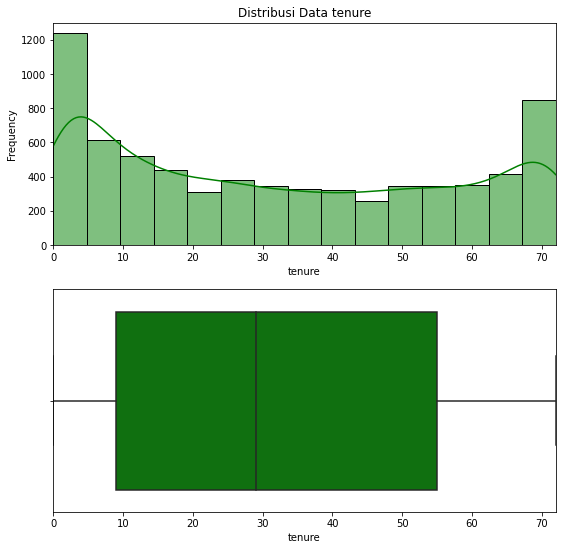

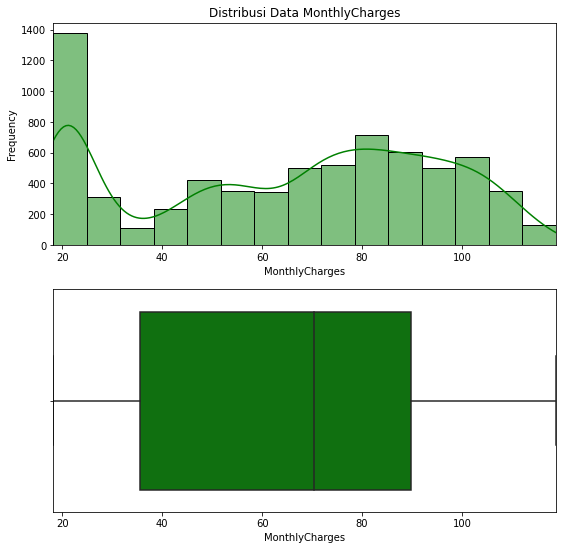

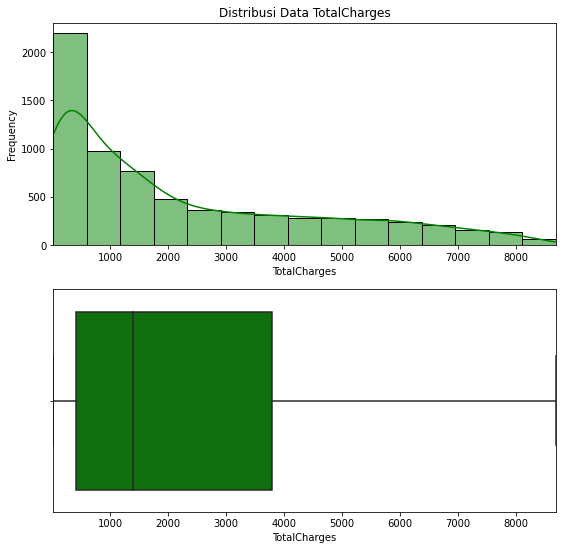

In [79]:
for col in numeric_col(df):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    plt.figure(figsize=(9, 9))
    histogram(df[col], 'g')
    boxplot(df[col], 'g')

> Data terdistrbusi skew namun tidak ada outlier yang terlihat.

Sekarang coba kita cek proporsi unique value dari masing-masing fitur.

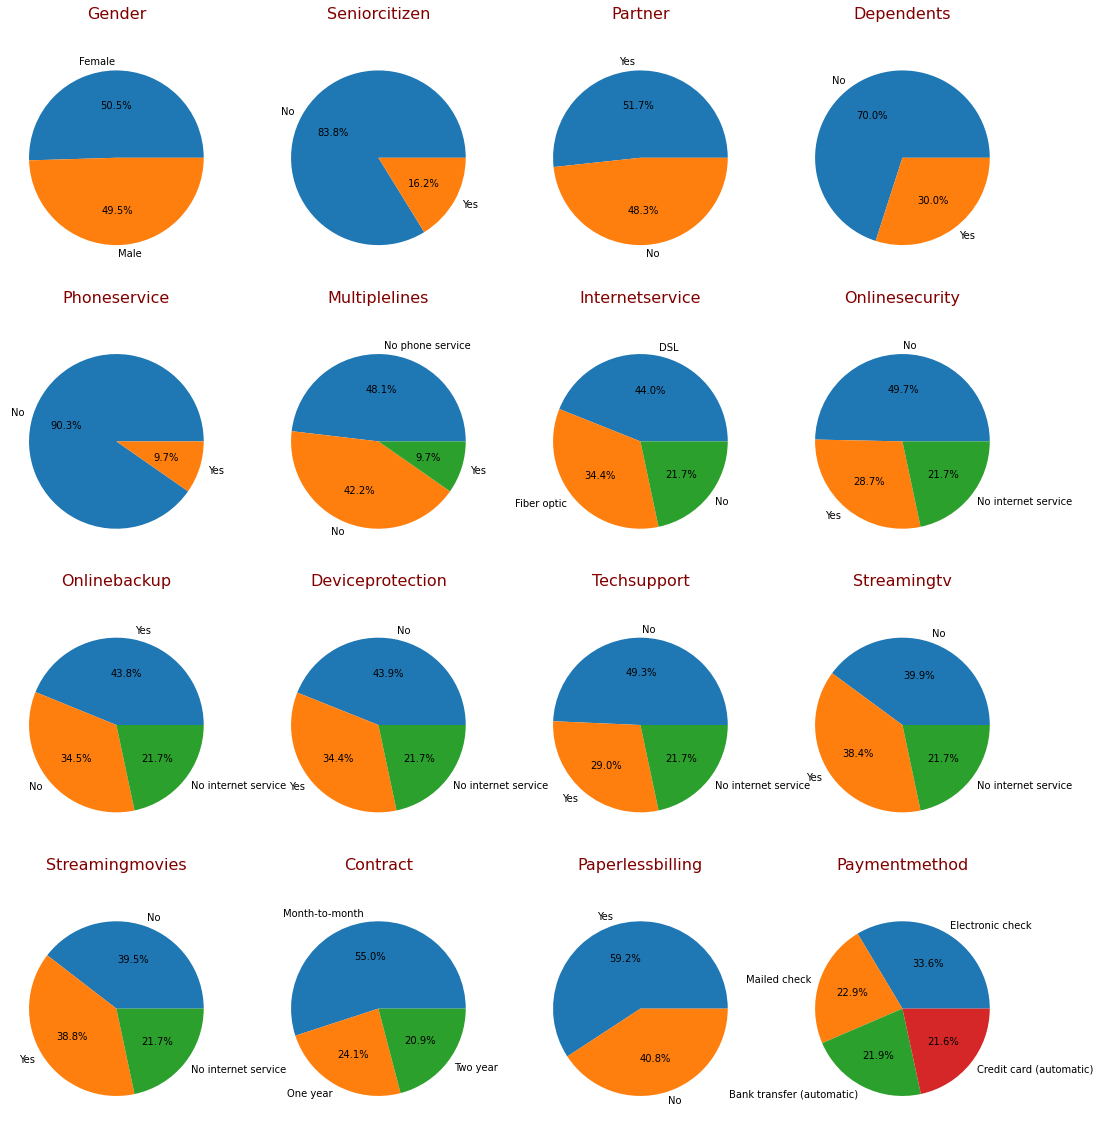

In [80]:
plt.figure(figsize=(18, 20))
catcol = object_col(df)
catcol.remove('customerID'); catcol.remove('Churn')
for i, col in enumerate(catcol):
    plt.subplot(len(catcol)//4, 4, i+1)
    plt.title(f'{col.capitalize()}', loc='center', pad=30, fontsize=16, color='maroon')  
    plt.pie(
        df[col].value_counts(), 
        labels=df[col].unique(), 
        autopct='%1.1f%%'
    )
plt.show()

Berdasarkan pie chart di atas disimpulkan bahwa:
1. Jumlah female dan male adalah setara.
2. Proporsi Partner hampir setara dan sedikit lebih besar Yes yaitu 51.7%.
3. Mayoritas pengguna Internetservice adalah DSL dan fiber optic.
4. Fitur dengan proporsi terbanyak No yaitu Seniorcitizen, Dependents, Phoneservice, Multiplelines, Onlinesecurity, Onlinebackup, Deviceprotection, Techsupport, Streamingtv, dan streamingmovies.
5. Mayoritas Contract adalah Month-to-month.
6. Mayoritas Paperlessbilling adalah Yes. 
7. Masing-masing Paymentmethod memiliki jumlah yang setara tetapi paling banyak adalah Electronic check.

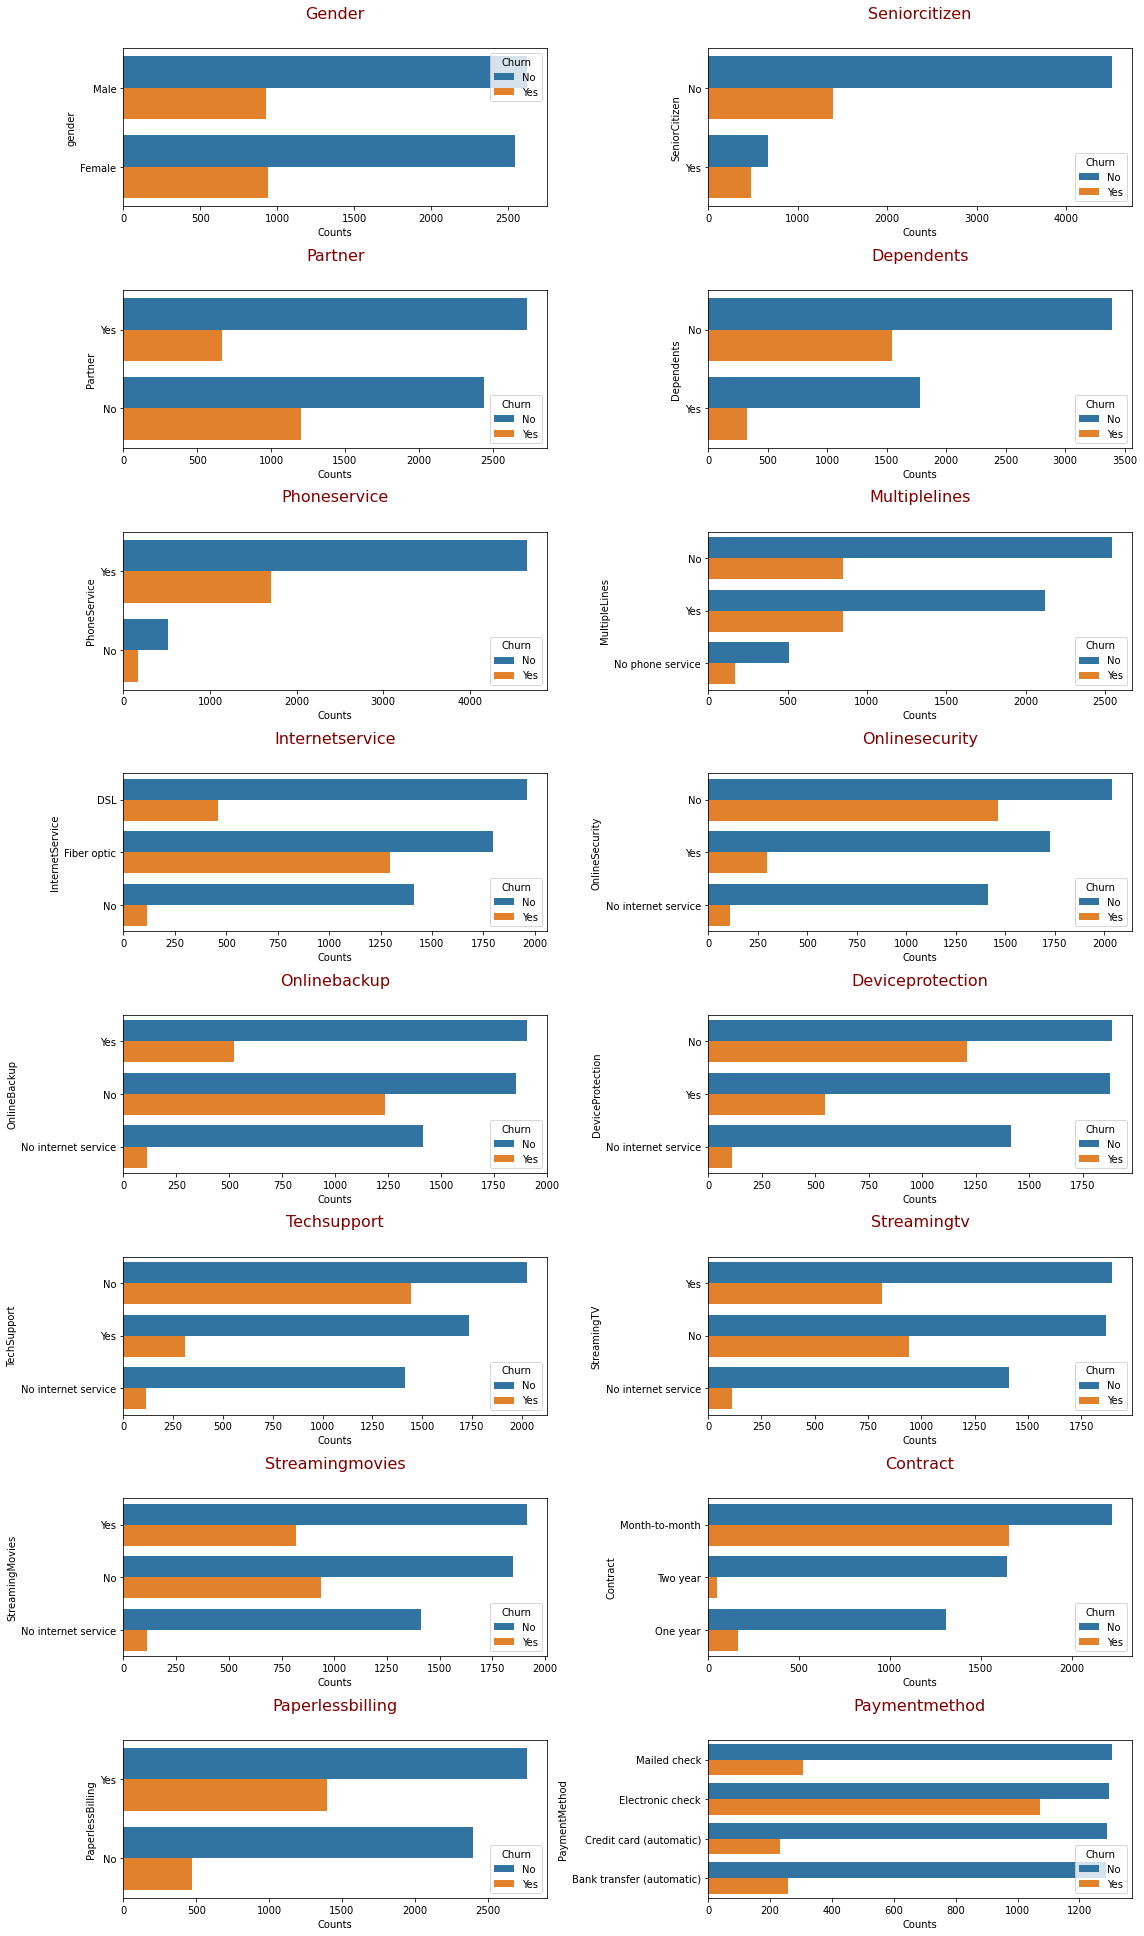

In [81]:
plt.figure(figsize=(16, 27))
for i, col in enumerate(catcol):
    groupby_col_churn = df.groupby('Churn')[col].value_counts()
    groupby_col_churn = groupby_col_churn.reset_index(name='Counts')
    plt.subplot(len(catcol)//2, 2, i+1)
    plt.title(f'{col.capitalize()}', loc='center', pad=30, fontsize=16, color='maroon')  
    sns.barplot(x='Counts' ,y=col, data=groupby_col_churn, hue='Churn')
plt.tight_layout()
plt.show()

Dari gambar di atas dapat disimpulkan bahwa:
1. Mayoritas jumlah churn dari setiap fitur masih mengikuti proporsi data label.
2. Jumlah Churn yes pada fiberoptic lebih banyak dibandingkan dengan jumlah churn yes pada DSL.
3. Jumlah Churn yes pada Onlinesecurity no lebih banyak dibandingkan dengan jumlah churn yes yang lain.
4. Jumlah Churn yes pada Onlinebackup no lebih banyak dibandingkan dengan jumlah churn yes yang lain.
5. Jumlah Churn yes pada Deviceprotection no lebih banyak dibandingkan dengan jumlah churn yes yang lain.
6. Jumlah Churn yes pada Techsupport no lebih banyak dibandingkan dengan jumlah churn yes yang lain.
7. Jumlah Churn yes pada Contract Month-to-month lebih banyak dibandingkan dengan jumlah churn yes yang lain.
8. Jumlah Churn yes pada Paperlessbilling yes lebih banyak dibandingkan dengan jumlah Paperlessbilling no.
9. Jumlah Churn yes pada Paymentmethod berupa electronic check lebih banyak dibandingkan dengan jumlah churn yes yang lain.

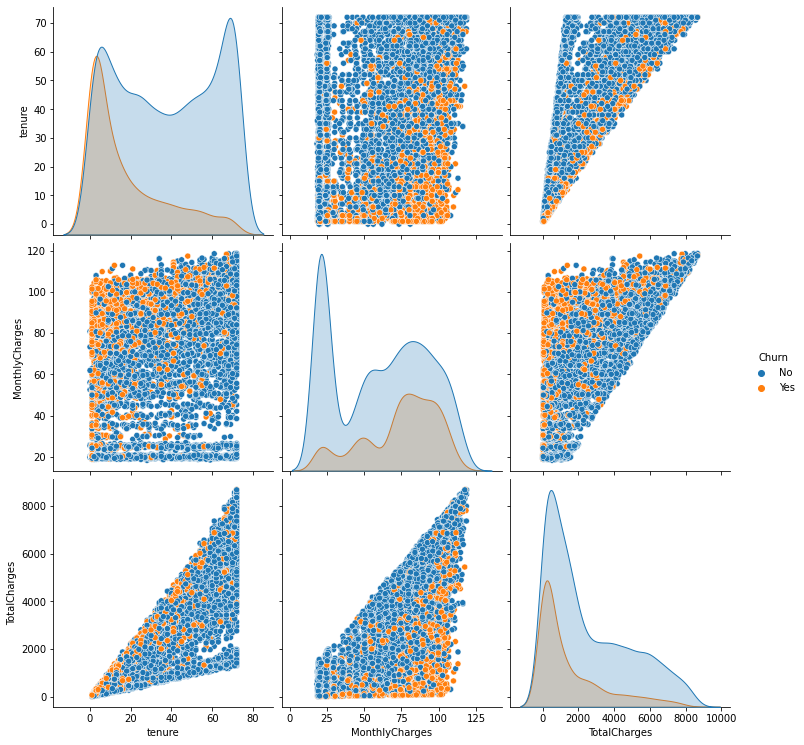

In [82]:
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
numcol_churn = df[numeric_col(df)]
numcol_churn['Churn'] = df['Churn']

sns.pairplot(data=numcol_churn, hue="Churn", height=3.5)

> Dari plot scatter di atas terlihat bahwa terdapat dua kklaster yang menjadi pemisah antara Churn yes dan Churn No.

### Uji Hipotesis

#### Kategorik

Kita ingin menyelidiki hubungan antara kolom kategorik dengan label, apakah ada keterkaitan antara keduanya dengan menggunakan uji hipotesis chi square ($χ^2$). Level significant yang digunakan sebesar 5%.

* Hipotesis null $H_{0}$ yaitu tidak terdapat hubungan (**independent**) antara kolom $i$ dengan label Churn. Sedangkan hipotesis alternatif $H_i$ yaitu terdapat hubungan (**dependent**) antara kolom $i$ dengan label Churn.
* Secara umum, jika dituliskan sebagai berikut:
$$ H_0 : \text{fitur ketegori-i dengan label Churn adalah independent}$$
$$ H_i : \text{fitur ketegori-i dengan label Churn adalah dependent}$$

Mari kita definisikan terlebih dulu fungsi untuk menghitung chi square.

In [83]:
def chi2(datacrosstab):
    stat, pval, dof, expected = stats.chi2_contingency(datacrosstab)
    return stat, pval, dof, expected

Kita bisa langsung melihat nilai p-value untuk setiap kolom dengan targetnya.

In [84]:
print('p-value categorical columns:')
for objcol in object_col(df):
    # Pengecualian kolom y 
    if objcol not in ['customerID', 'Churn']:
        # membuat contingency table
        contingency_table = pd.crosstab(df[objcol], df['Churn'])
        p = chi2(contingency_table)[1]
        alpha = 0.05
        if p < alpha:
            print(f'{objcol : <18}: {p:.2f} (dependent)')
        else:
            print(f'{objcol : <18}: {p:.2f} (indedependent)')

p-value categorical columns:
gender            : 0.49 (indedependent)
SeniorCitizen     : 0.00 (dependent)
Partner           : 0.00 (dependent)
Dependents        : 0.00 (dependent)
PhoneService      : 0.34 (indedependent)
MultipleLines     : 0.00 (dependent)
InternetService   : 0.00 (dependent)
OnlineSecurity    : 0.00 (dependent)
OnlineBackup      : 0.00 (dependent)
DeviceProtection  : 0.00 (dependent)
TechSupport       : 0.00 (dependent)
StreamingTV       : 0.00 (dependent)
StreamingMovies   : 0.00 (dependent)
Contract          : 0.00 (dependent)
PaperlessBilling  : 0.00 (dependent)
PaymentMethod     : 0.00 (dependent)


> Dari hasil uji hipotesis chi square antara fitur kategorik dengan label Churn didapatkan bahwa semua fitur (**kecuali** gender dan Phoneservice) memiliki nilai p-value lebih kecil dari $α$ yang berarti $H_0$ ditolak yaitu label Churn dengan fitur terkait adalah **dependent**. Sedangkan fitur gender dan Phoneservice memiliki nilai p-value lebih besar dari $α$ yang berarti $H_0$ gagal ditolak yaitu label Churn dengan fitur tersebut adalah **independent**. 

> Berdasarkan uji hipotesis di atas terlihat bahwa fitur-fitur yang independent dengan Churn adalah gender dan phoneservice. Ini terlihat pada grafik horizontal bar sebelumnya yang memperlihatkan bahwa rasio antara churn yes dan no pada masing-masing unique value gender dan Phoneservice adalah kurang lebih sama (tidak terdapat perbedaaan). Dengan demikian, fitur tersebut tidak memiliki keterkaitan dengan Churn sehingga dapat dipertimbangkan untuk tidak digunakan.

## v. Data Preprocessing

### Feature Selection

Kita drop fitur yang tidak digunakan yaitu `'customerID', 'gender', 'PhoneService'`.

In [85]:
df.drop(['customerID', 'gender', 'PhoneService'], axis=1, inplace=True)

Membuat data inference dari dataset sebanyak 5 buah.

Memilih data yang tidak mengandung missing value.

In [86]:
df_notna = df[~df.isna().any(axis=1)]

Mengambil secara random 5 data dari data_notna.

In [87]:
data_inf = df_notna.sample(5, random_state=5)

Drop baris dataset yang sudah digunakan untuk data inferensial.

In [88]:
df.drop(data_inf.index, inplace=True)

Reset index untuk dataset dan data inferensial.

In [89]:
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Splitting Data

Split data untuk train, validation, dan test.

In [90]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=4)

### Handling Outliers

Berdasarkan EDA, distribusi fitur numerik seluruhnya tidak memililki outlier sehingga langkah ini dapat dilewati.

### Handling Missing Values

Cek missing value.

In [91]:
print('Missing value:')
for col in X_train.columns:
    if missval_pct(X_train[col])[0] > 0:
        print(f'{col} : {missval_pct(X_train[col])[1]:.2f}% or {missval_pct(X_train[col])[0]} data')

Missing value:
TotalCharges : 0.09% or 6 data


Karena jumlah missing valuenya sangat kecil, kita dapat drop baris tersebut.

In [92]:
# Drop baris missing value pada X
X_train.dropna(axis=0, inplace=True)
X_val.dropna(axis=0, inplace=True)
X_test.dropna(axis=0, inplace=True)

# Baris pada data y mengikuti X
y_train = y_train.loc[X_train.index]
y_val = y_val.loc[X_val.index]
y_test = y_test.loc[X_test.index]

### Feature Encoding

Kita cek kembali unique value di setiap fitur kategorik.

In [93]:
for catcol in object_col(X_train):
    print(f'{catcol : <18}: {X_train[catcol].unique()}')

SeniorCitizen     : ['No' 'Yes']
Partner           : ['No' 'Yes']
Dependents        : ['No' 'Yes']
MultipleLines     : ['Yes' 'No' 'No phone service']
InternetService   : ['Fiber optic' 'No' 'DSL']
OnlineSecurity    : ['Yes' 'No' 'No internet service']
OnlineBackup      : ['No' 'Yes' 'No internet service']
DeviceProtection  : ['No' 'Yes' 'No internet service']
TechSupport       : ['No' 'Yes' 'No internet service']
StreamingTV       : ['No' 'Yes' 'No internet service']
StreamingMovies   : ['No' 'Yes' 'No internet service']
Contract          : ['Month-to-month' 'Two year' 'One year']
PaperlessBilling  : ['Yes' 'No']
PaymentMethod     : ['Electronic check' 'Credit card (automatic)' 'Mailed check'
 'Bank transfer (automatic)']


Nilai unique value `No phone service` dan `No internet service` kita jadikan `No` sesuai deskripsi agar lebih memudahkan.

In [94]:
X_train = X_train.replace(['No phone service', 'No internet service'], 'No')
X_val = X_val.replace(['No phone service', 'No internet service'], 'No')
X_test = X_test.replace(['No phone service', 'No internet service'], 'No')

Kemudian kita membuat list nama kolom yang merupakan kolom dengan 2 unique value (bernama binary_col) dan lebih dari 2 unique value (bernama ohe_col).

In [95]:
ohe_col = ['InternetService', 'Contract', 'PaymentMethod']
binary_col = object_col(X_train)
for ohe in ohe_col:
    binary_col.remove(ohe)

Kita encoding fitur dengan value yes dan no.

In [96]:
le = OrdinalEncoder()
X_train_cat_le = le.fit_transform(X_train[binary_col])
X_val_cat_le = le.transform(X_val[binary_col])
X_test_cat_le = le.transform(X_test[binary_col])

X_train[binary_col].shape, X_train_cat_le.shape

((4498, 11), (4498, 11))

Selanjutnya kita encoding fitur dengan unique value lebih dari 2 dengan OneHotEncoder (diasumsikan fitur kategorik nominal).

In [97]:
ohe = OneHotEncoder(sparse=False)
X_train_cat_ohe = ohe.fit_transform(X_train[ohe_col])
X_val_cat_ohe = ohe.transform(X_val[ohe_col])
X_test_cat_ohe = ohe.transform(X_test[ohe_col])

X_train[ohe_col].shape, X_train_cat_ohe.shape

((4498, 3), (4498, 10))

Kemudian terakhir, label kita encoding untuk training.

In [98]:
yle = LabelEncoder()
y_train_final_imbalance = yle.fit_transform(y_train)
y_val_final = yle.transform(y_val)
y_test_final = yle.transform(y_test)

### Feature Scalling

Selanjutnya untuk fitur numerik kita lakukan scaling.

In [99]:
num_col = numeric_col(X_train) # list fitur numerik

X_train_num = X_train[num_col]
X_val_num = X_val[num_col]
X_test_num = X_test[num_col]

 Scaling menggunakan MinMaxScaler karena distribusi data yang skew.

In [100]:
scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num.shape, X_train_num_scaled.shape

((4498, 3), (4498, 3))

### Feature Join

Menggabungkan ketiga array yaitu encoding dan scalling menjadi satu array.

In [101]:
X_train_final_imbalance = np.concatenate((X_train_cat_le, X_train_cat_ohe, X_train_num_scaled), axis=1)
X_val_final = np.concatenate((X_val_cat_le, X_val_cat_ohe, X_val_num_scaled), axis=1)
X_test_final = np.concatenate((X_test_cat_le, X_test_cat_ohe, X_test_num_scaled), axis=1)

In [102]:
pd.DataFrame(X_train_final_imbalance)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.625311,0.088346
1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.690141,0.850025,0.582994
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.591549,0.674639,0.407664
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.774648,0.063777,0.162169
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.971831,0.569008,0.599334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.154930,0.664175,0.113196
4494,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,0.635277,0.665299
4495,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.015446,0.000127
4496,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.971831,0.620827,0.646103


### Label Balancing

Jumlah proporsi label Churn antara Yes dan No sedikit tidak berimbang. Oleh karenanya kita lakukan oversampling yaitu menambahkan beberapa data yang termasuk label minoritas sehingga jumlah akhirnya akan setara dengan label mayoritas.

In [103]:
pd.Series(y_train_final_imbalance).value_counts()

0    3303
1    1195
dtype: int64

Disini label minoritas adalah Yes dan label mayoritas adalah No. Kita akan melakukan oversampling terhadap label Yes dengan menggunakan teknik Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Teknik ini akan menambahkan data dengan mempertahankan nilai kategorik nominal data.

In [104]:
smotenc = SMOTENC(np.arange(21), random_state=7)
X_train_final, y_train_final = smotenc.fit_resample(X_train_final_imbalance, y_train_final_imbalance)
pd.Series(y_train_final).value_counts()

0    3303
1    3303
dtype: int64

### Preprocessing with Pipeline

Proses yang kita buat dari feature encoding, feature scalling, dan oversampling dapat kita satukan menggunakan pipeline dari scikit-learn. Langkah awal adalah menyatukan proses dari ketiga langkah encoding dan scalling yaitu menggunakan column transformer. Column Transformer ini belum termasuk SMOTENC karena SMOTENC dilakukan setelah langkah penggabungan data dan hanya dilakukan pada train set.

Proses yang dilakukan adalah sebagai berikut:
1. Encoding value yes no pada fitur-fitur `binary_col`
2. Encoding one hot pada fitur-fitur `ohe_col`
3. Scalling minmax pada fitur-fitur `num_col`

In [105]:
branch_pipeline = ColumnTransformer([
        ('cat_le', OrdinalEncoder(), binary_col),
        ('cat_ohe', OneHotEncoder(sparse=False), ohe_col),
        ('minmax', MinMaxScaler(), num_col)
    ])

Kita lanjutkan untuk `fit` pada train set lalu `transform` data pada validation set dan test set.

In [106]:
branch_pipeline.fit(X_train)
X_val_final = branch_pipeline.transform(X_val)
X_test_final = branch_pipeline.transform(X_test)

Selanjutnya dilanjutkan membuat pipeline untuk menggabungkan pipeline column transformer sebelumnya dengan SMOTENC. 

In [107]:
full_pipeline = Pipeline([
    ('branch', branch_pipeline),
    ('smotenc', SMOTENC(np.arange(21), random_state=7))
])

full_pipeline

Pipeline(steps=[('branch',
                 ColumnTransformer(transformers=[('cat_le', OrdinalEncoder(),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessBilling']),
                                                 ('cat_ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['InternetService',
                                                   'Contract',
                                                   'PaymentMethod']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('smotenc',
                 SMOTENC(categorical_features=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),
                         random_state=7))])

Selanjutnya kita lakukan `fit` dan `resample` terhadap data X_train dan y_train.

In [108]:
X_train_final, y_train_final = full_pipeline.fit_resample(X_train, y_train_final_imbalance)

### TensorFlow Data Pipeline

Membuat input data pipeline `tf.data.Dataset` dengan jumlah shuffle sebanyak jumlah data dan batch sebesar 32 data.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).shuffle(X_train.shape[0]).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val_final)).shuffle(X_train.shape[0]).batch(32)

## vi. Model Definition

### Sequential

Mendefinisikan model neural network secara sequential dengan loss binary crossentropy, optimizer adam, dan metrics validasi awal yaitu akurasi.

In [110]:
n_neuron1 = (13, 8, 5, 3) # Misalkan jumlah neuron di hidden layer adalah 13, 8, 5, 3

# Arsitektur Model_Sequential
n_feature = X_train_final.shape[1]
model_seq = Sequential()
model_seq.add(Input(shape=(n_feature, ))) # INPUT LAYER

for n in n_neuron1:  # HIDDEN LAYER
    model_seq.add(Dense(n, activation='relu'))

model_seq.add(Dense(1, activation='sigmoid'))  # OUTPUT LAYER
 
# Compile Model_Sequential
model_seq.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### Functional

Mendefinisikan model neural network secara functional dengan loss binary crossentropy, optimizer adam, dan metrics validasi awal yaitu akurasi.

In [111]:
n_neuron2 = (21, 13, 8, 5) # Misalkan jumlah neuron di hidden layer adalah 21, 13, 8, 5

# Arsitektur Model_Functional
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in
for n in n_neuron2: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n) # OUTPUT LAYER

model_func = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## vii. Model Training

### Sequential

Training data menggunakan `train_dataset`, validasi data menggunakan `val_dataset`, dan epoch 40 kali.

In [112]:
seq_train = model_seq.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
207/207 [==============================] - 2s 4ms/step - loss: 0.6387 - accuracy: 0.6552 - val_loss: 0.5168 - val_accuracy: 0.7387
Epoch 2/40
207/207 [==============================] - 1s 3ms/step - loss: 0.5551 - accuracy: 0.7626 - val_loss: 0.5171 - val_accuracy: 0.6951
Epoch 3/40
207/207 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.7623 - val_loss: 0.5023 - val_accuracy: 0.7129
Epoch 4/40
207/207 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.7682 - val_loss: 0.4957 - val_accuracy: 0.7111
Epoch 5/40
207/207 [==============================] - 1s 3ms/step - loss: 0.4962 - accuracy: 0.7770 - val_loss: 0.4952 - val_accuracy: 0.7164
Epoch 6/40
207/207 [==============================] - 1s 3ms/step - loss: 0.4847 - accuracy: 0.7810 - val_loss: 0.5047 - val_accuracy: 0.7031
Epoch 7/40
207/207 [==============================] - 1s 3ms/step - loss: 0.4740 - accuracy: 0.7856 - val_loss: 0.4883 - val_accuracy: 0.7333
Epoch 

### Functional

Training data menggunakan `train_dataset`, validasi data menggunakan `val_dataset`, dan epoch 40 kali.

In [407]:
func_train = model_func.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
207/207 [==============================] - 1s 2ms/step - loss: 0.6079 - accuracy: 0.6726 - val_loss: 0.5325 - val_accuracy: 0.7342
Epoch 2/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7814 - val_loss: 0.4890 - val_accuracy: 0.7564
Epoch 3/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7891 - val_loss: 0.5439 - val_accuracy: 0.7093
Epoch 4/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7902 - val_loss: 0.4874 - val_accuracy: 0.7476
Epoch 5/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8002 - val_loss: 0.5422 - val_accuracy: 0.7191
Epoch 6/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.7999 - val_loss: 0.5281 - val_accuracy: 0.7316
Epoch 7/40
207/207 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8020 - val_loss: 0.5720 - val_accuracy: 0.7031
Epoch 

## viii. Model Evaluation

Membuat fungsi untuk menampilkan grafik loss dan akurasi.

In [116]:
def loss_acc(data_result):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
    ax[0].plot(np.arange(1, 1+len(data_result)), data_result['loss'])
    ax[0].plot(np.arange(1, 1+len(data_result)), data_result['val_loss'])
    ax[0].set_title('Loss', fontsize=16, loc='center', color='maroon')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(labels=['loss', 'val_loss'])

    ax[1].plot(np.arange(1, 1+len(data_result)), data_result['accuracy'])
    ax[1].plot(np.arange(1, 1+len(data_result)), data_result['val_accuracy'])
    ax[1].set_title('Accuracy', fontsize=16, loc='center', color='maroon')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, symbol='%'))
    ax[1].legend(labels=['accuracy', 'val_accuracy'])

    plt.tight_layout()
    plt.show()

Mendefinisikan fungsi untuk menampilkan classification report.

In [117]:
def class_report(model):
    y_pred = model.predict(X_test_final)
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    print(classification_report(y_test_final, y_pred))

### Sequential

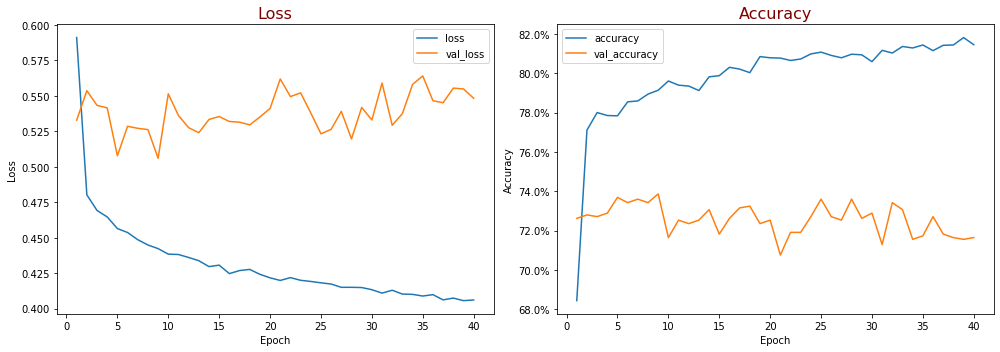

In [92]:
seq_result = pd.DataFrame(seq_train.history)
loss_acc(seq_result)

> Berdasarkan grafik di atas menunjukkan loss dan akurasi yang overfit. Grafik loss validasi setelah melewati epoch ke 10 sudah nampak mulai naik dan disebut dengan overfit. Sedangkan untuk akurasi juga demikian saat telah melewati epoch ke 10 akurasi validasi cenderung mengalami penurunan. Tetapi secara umum model di hampir seluruh epoch mengalami overfit. Secara umum akurasi model yang didapatkan berkisar antara 72% hingga 82%.

In [109]:
class_report(model_seq)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1031
           1       0.51      0.75      0.61       373

    accuracy                           0.74      1404
   macro avg       0.70      0.74      0.71      1404
weighted avg       0.79      0.74      0.75      1404



$$ Recall_1 = \frac{TP_1}{TP_1+FN_1}$$
> Classification report di atas adalah hasil perhitungan prediksi model neural network sequential API terhadap test set dan label benarnya. Kita akan fokus terhadap parameter recall. Terlihat bahwa recall yang didapatkan cukup seimbang antara class Churn No sebesar 74% dan class Churn Yes sebesar 75% dengan rata-ratanya adalah 74%. Class Churn Yes yang memiliki recall 75% artinya dalam 100 data yang benar, model mampu menghasilkan prediksi benar sebanyak 75 buah data.

### Functional

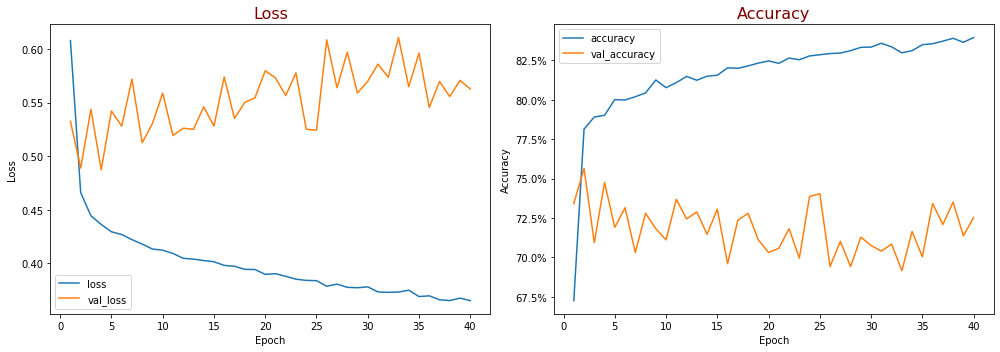

In [408]:
func_result = pd.DataFrame(func_train.history)
loss_acc(func_result)

> Berdasarkan grafik di atas menunjukkan loss dan akurasi yang overfit. Grafik loss validasi setelah melewati epoch ke 2 sudah nampak mulai naik dan disebut dengan overfit. Sedangkan untuk akurasi juga demikian saat telah melewati epoch ke 2 akurasi validasi cenderung mengalami penurunan. Tetapi secara umum model di hampir seluruh epoch mengalami overfit. Secara umum akurasi model yang didapatkan berkisar antara 72% hingga 82%.

In [410]:
class_report(model_func)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1031
           1       0.50      0.71      0.59       373

    accuracy                           0.74      1404
   macro avg       0.69      0.73      0.70      1404
weighted avg       0.78      0.74      0.75      1404



> Classification report di atas adalah hasil perhitungan prediksi model neural network functional API terhadap test set dan label benarnya. Kita akan fokus terhadap parameter recall. Terlihat bahwa recall yang didapatkan cukup seimbang antara class Churn No sebesar 75% dan class Churn Yes sebesar 71% dengan rata-ratanya adalah 75%. Class Churn Yes yang memiliki recall 71% artinya dalam 100 data yang benar, model mampu menghasilkan prediksi benar sebanyak 71 buah data.

### Model Improvement

* Sequential

Melakukan pendefinisian model sequential API dengan dropout 0.1 dan optimizer adamax.

In [113]:
# Arsitektur
model_seq_improve = Sequential()
model_seq_improve.add(Input(shape=(n_feature, ))) # INPUT LAYER

for n in n_neuron1:  # HIDDEN LAYER
    model_seq_improve.add(Dense(n, activation='relu'))
    model_seq_improve.add(Dropout(0.1))

model_seq_improve.add(Dense(1, activation='sigmoid')) # OUTPUT LAYER

# Compile Model_Seq_improveuential
model_seq_improve.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
)

Training data.

In [114]:
seq_train_improve = model_seq_improve.fit(train_dataset, epochs=22, validation_data=val_dataset)

Epoch 1/22
207/207 [==============================] - 2s 4ms/step - loss: 0.6919 - accuracy: 0.5089 - val_loss: 0.7277 - val_accuracy: 0.4062
Epoch 2/22
207/207 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.6096 - val_loss: 0.7186 - val_accuracy: 0.5431
Epoch 3/22
207/207 [==============================] - 1s 3ms/step - loss: 0.6428 - accuracy: 0.6558 - val_loss: 0.7069 - val_accuracy: 0.6169
Epoch 4/22
207/207 [==============================] - 1s 3ms/step - loss: 0.6360 - accuracy: 0.6729 - val_loss: 0.6922 - val_accuracy: 0.6516
Epoch 5/22
207/207 [==============================] - 1s 3ms/step - loss: 0.6218 - accuracy: 0.6947 - val_loss: 0.6851 - val_accuracy: 0.6631
Epoch 6/22
207/207 [==============================] - 1s 4ms/step - loss: 0.6118 - accuracy: 0.7107 - val_loss: 0.6821 - val_accuracy: 0.6720
Epoch 7/22
207/207 [==============================] - 1s 3ms/step - loss: 0.6072 - accuracy: 0.7118 - val_loss: 0.6709 - val_accuracy: 0.6853
Epoch 

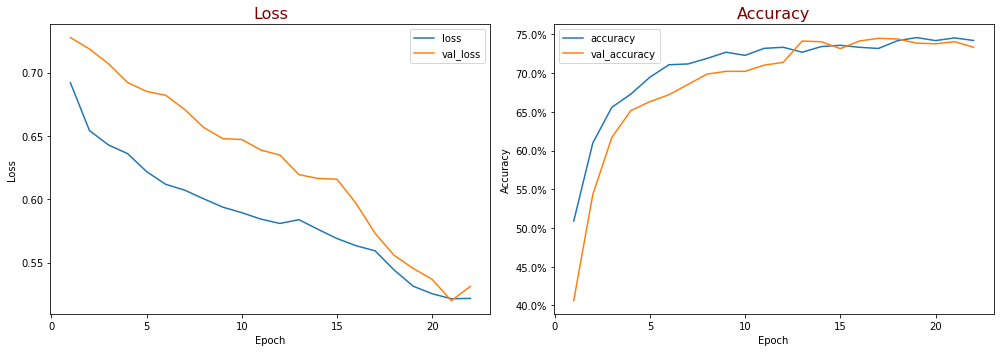

In [118]:
seq_result_improve = pd.DataFrame(seq_train_improve.history)
loss_acc(seq_result_improve)

> Berdasarkan grafik di atas improvement yang dilakukan sudah cukup baik dan lebih stabil dibandingkan model neural network sequential sebelumnya. Model terbaik berada pada epoch sekitar 15.

In [119]:
class_report(model_seq_improve)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1031
           1       0.53      0.79      0.64       373

    accuracy                           0.76      1404
   macro avg       0.72      0.77      0.73      1404
weighted avg       0.81      0.76      0.77      1404



> Berdasarkan classification report terlihat bahwa rata-rata recall adalah 77% dan recall untuk Churn Yes adalah 76%. Ini berarti dalam 100 data Churn yang sebenarnya Yes, model dapat memprediksi Churn yes sebanyak 76 data. Model setelah dilakukan improvement lebih baik daripada model sebelumnya.

* Functional

In [521]:
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in
for n in n_neuron2: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)
    hidden_n = Dropout(0.28)(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n) # OUTPUT LAYER

model_func_improve = Model(inputs=data_in, outputs=data_out)

# Compile Model_Func_improvetional
model_func_improve.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [522]:
func_train_improve = model_func_improve.fit(train_dataset, epochs=22, validation_data=val_dataset)

Epoch 1/22
207/207 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.5805 - val_loss: 0.6187 - val_accuracy: 0.6978
Epoch 2/22
207/207 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6427 - val_loss: 0.5574 - val_accuracy: 0.7058
Epoch 3/22
207/207 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6706 - val_loss: 0.5338 - val_accuracy: 0.7378
Epoch 4/22
207/207 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.6941 - val_loss: 0.5313 - val_accuracy: 0.7449
Epoch 5/22
207/207 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.7163 - val_loss: 0.5329 - val_accuracy: 0.7378
Epoch 6/22
207/207 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7321 - val_loss: 0.5175 - val_accuracy: 0.7413
Epoch 7/22
207/207 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7390 - val_loss: 0.5175 - val_accuracy: 0.7387
Epoch 

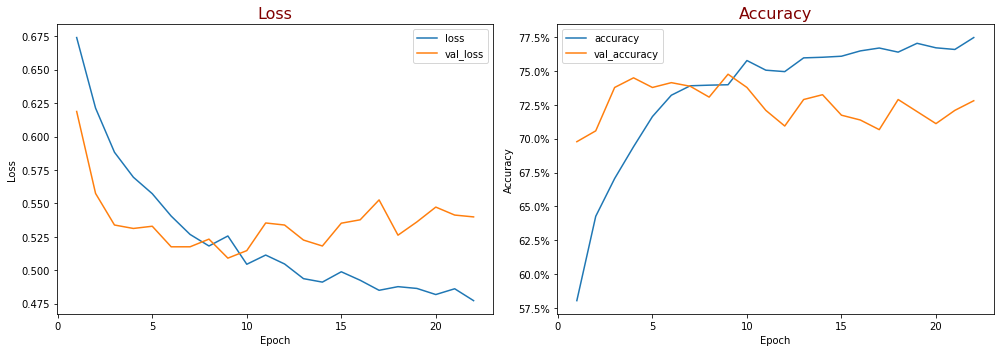

In [523]:
func_result_improve = pd.DataFrame(func_train_improve.history)
loss_acc(func_result_improve)

> Berdasarkan grafik di atas improvement yang dilakukan sudah cukup baik dibandingkan model neural network functional sebelumnya. Model terbaik berada pada epoch sekitar 5 hingga 10.

In [524]:
class_report(model_func_improve)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1031
           1       0.52      0.76      0.62       373

    accuracy                           0.75      1404
   macro avg       0.71      0.76      0.72      1404
weighted avg       0.80      0.75      0.76      1404



> Berdasarkan classification report terlihat bahwa rata-rata recall adalah 76% dan recall untuk Churn Yes adalah 76%. Ini berarti dalam 100 data Churn yang sebenarnya Yes, model dapat memprediksi Churn yes sebanyak 76 data. Model setelah dilakukan improvement lebih baik daripada model sebelumnya.

## ix. Model Saving

Save model sequential API dan functional API.

In [567]:
# Sequential
model_seq_improve.save('nn_seq_telco')

# Functional
model_func_improve.save('nn_func_telco')

INFO:tensorflow:Assets written to: nn_seq_telco/assets
INFO:tensorflow:Assets written to: nn_func_telco/assets


Save pipeline dari scikit-learn dan imblearn.

In [57]:
# simpan model
with open("deployment/branch_pipe.pkl", "wb") as f:
    pickle.dump(branch_pipeline, f)

In [58]:
with open("deployment/full_pipe.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)

## x. Model Inference

Load data inferensial.

In [541]:
data_inf

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,Yes,13,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),52.10,670.65,No
1,No,No,No,5,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.05,202.15,No
2,No,Yes,Yes,70,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),93.90,6579.05,Yes
3,No,No,No,9,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.40,857.25,Yes
4,No,Yes,Yes,19,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.95,1875.55,Yes


### Missing Value

Cek Missing value

In [540]:
data_inf.isna().any().any()

False

In [545]:
data_inf.drop('Churn', axis=1, inplace=True)

In [542]:
data_inf = data_inf.replace(['No phone service', 'No internet service'], 'No')

### Preprocessing Pipeline

In [561]:
with open('deployment/branch_pipe.pkl', 'rb') as f:
    pipe_branch = pickle.load(f)

In [562]:
data_inf_final = pd.DataFrame(pipe_branch.transform(data_inf))
data_inf_final

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.169014,0.335825,0.075214
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.056338,0.255605,0.021152
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.971831,0.752367,0.757009
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112676,0.757349,0.096746
4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.253521,0.822621,0.214252


### Data Prediction

In [563]:
# Sequential
saved_seq_improved = load_model('nn_seq_telco')

# Functional
saved_func_improved = load_model('nn_func_telco')

* Sequential API

In [564]:
res_inf = saved_seq_improved.predict(data_inf_final)
res_inf = np.where(res_inf >= 0.5, 1, 0)
yle.inverse_transform(np.ravel(res_inf))

array(['No', 'Yes', 'No', 'Yes', 'No'], dtype=object)

* Functional API

In [565]:
res_inf = saved_func_improved.predict(data_inf_final)
res_inf = np.where(res_inf >= 0.5, 1, 0)
yle.inverse_transform(np.ravel(res_inf))

array(['No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

## xi. Pengambilan Kesimpulan

1. Dataset yang digunakan adalah WA_Fn-UseC_-Telco-Customer-Churn.csv dari [kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).
2. Fitur yang tidak digunakan adalah `customerID`, `gender`, `PhoneService`.
3. Prediksi klasifikasi churn menggunakan dua model neural network yaitu:
    - Sequential API
        * hidden layer  : 4
        * jumlah neuron : 13, 8, 5, 3
        * activation    : relu (hidden), sigmoid (output)
        * loss          : binary crossentropy
        * optimizer     : adam
        * metrics       : accuracy
    - Functional API
        * hidden layer  : 4
        * jumlah neuron : 21, 13, 8, 5
        * activation    : relu (hidden), sigmoid (output)
        * loss          : binary crossentropy
        * optimizer     : adam
        * metrics       : accuracy
4. Tiap model mendapatkan akurasi dan rata-rata recall sebagai berikut:
    - Sequential API
        * Akurasi       : 74%
        * Avg Recall    : 74%
        * Recall Yes    : 75%
    - Functional API
        * Akurasi       : 74%
        * Avg Recall    : 73%
        * Recall Yes    : 71%
5. Model improvement dilakukan dengan menggunakan  klasifikasi churn menggunakan dua model neural network yaitu:
    - Sequential API
        * dropout       : 0.1
        * optimizer     : adamax
    - Functional API
        * dropout       : 0.28
        * optimizer     : rmsprop
6. Setelah dilakukan improvement masing-masing model mendapatkan hasil sebagai berikut: 
    - Sequential API
        * Akurasi       : 77%
        * Avg Recall    : 76%
        * Recall Yes    : 77%
    - Functional API
        * Akurasi       : 75%
        * Avg Recall    : 76%
        * Recall Yes    : 76%
7. Model terbaik yang didapatkan adalah sequntial API dengan recal yess 77%. Ini berarti setiap ada 100 data churn yes yang sebenarnya, model memprediksi benar sebanyak 77 data.